<class 'numpy.ndarray'>
areas: 
 [6.7 4.6 3.5 5.5]
prices: 
 [9.1 5.9 4.6 6.7]
data_size:  4


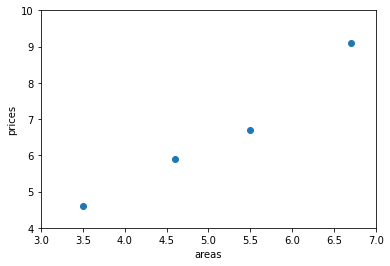

In [1]:
# load data

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
N = areas.size

print(type(areas))
print('areas: \n', areas)
print('prices: \n', prices)
print('data_size: ', N)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [3]:
# vector [x, b]
data = np.c_[areas, np.ones((N, 1))]
print('data \n', data)

theta = np.array([[-0.34],[0.04]])
print('theta \n', theta)

data 
 [[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]
theta 
 [[-0.34]
 [ 0.04]]


In [6]:
# params
n_epochs = 10
lr = 0.01

losses = [] # for debug
for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for index in range(N):
        # get data
        x_i = data[index:index+1]
        y_i = prices[index:index+1]

        # compute output y_hat_i
        y_hat_i = x_i.dot(theta)
        
        # compute loss
        l_i = (y_hat_i - y_i)*(y_hat_i - y_i)   
        
        # compute gradient
        g_l_i = 2*(y_hat_i - y_i)
        gradient = x_i.T.dot(g_l_i)
        
        # accumulate gradient
        gradients = gradients + gradient
        sum_of_losses = sum_of_losses + l_i
    
    # normalize
    sum_of_losses = sum_of_losses/N     
    gradients     = gradients/N    
    
    # for debug
    losses.append(sum_of_losses[0][0]) 
    
    # update
    theta = theta - lr*gradients    

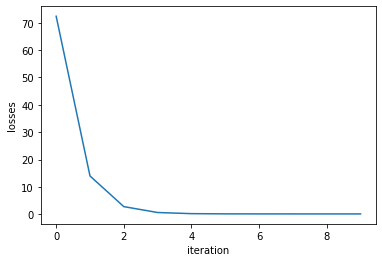

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

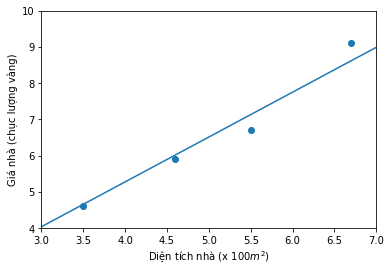

In [8]:
x_data = range(2, 8)
y_data = [x*theta[0] + theta[1] for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)

plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()